C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


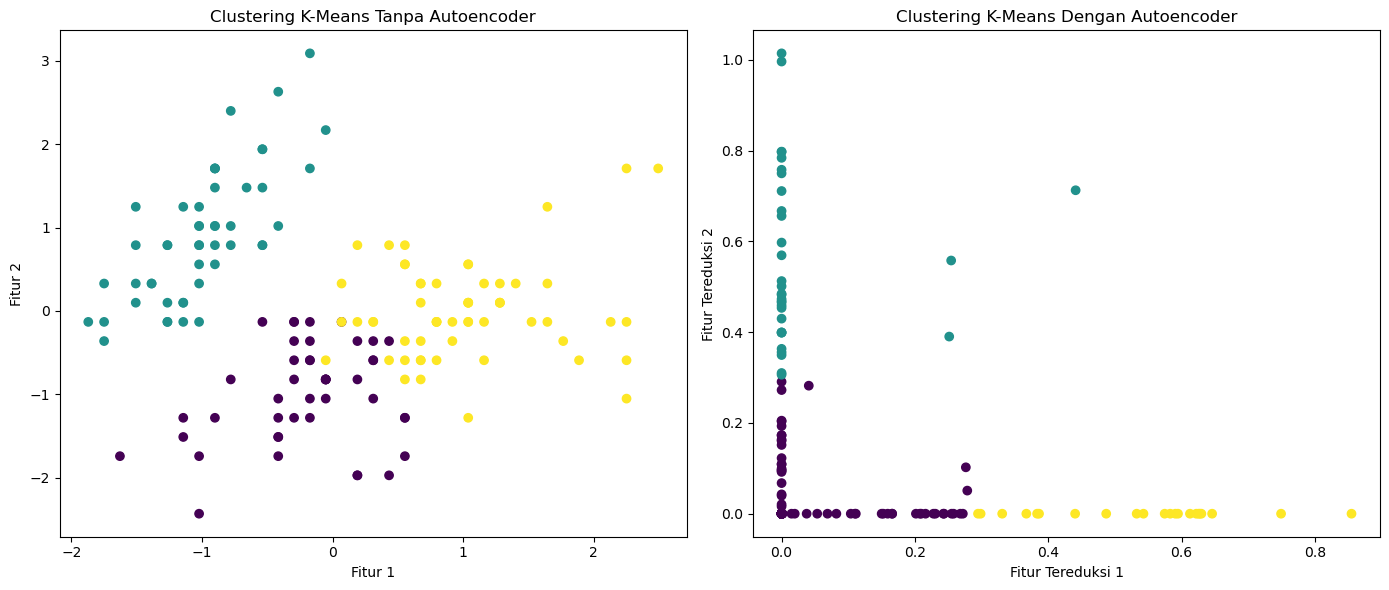

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
# Load dataset Iris
iris = load_iris()
X = iris.data
y = iris.target
# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Memisahkan data latih dan data uji
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# -------------------------
# K-Means tanpa Autoencoder
# -------------------------
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)
labels_no_autoencoder = kmeans.predict(X_scaled)  # Menggunakan predict untuk mendapatkan label pada seluruh data

# -------------------------
# Autoencoder
# -------------------------
# Membangun Autoencoder
input_layer = Input(shape=(X_train.shape[1],))
encoded = Dense(2, activation='relu')(input_layer)  # Mengurangi dimensi ke 2
decoded = Dense(X_train.shape[1], activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)

# Kompilasi dan melatih Autoencoder
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train, X_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Menggunakan Encoder untuk mendapatkan representasi
X_encoded = encoder.predict(X_scaled)

# K-Means dengan Autoencoder
kmeans_autoencoder = KMeans(n_clusters=3, random_state=42)
kmeans_autoencoder.fit(X_encoded)
labels_autoencoder = kmeans_autoencoder.predict(X_encoded)  # Menggunakan predict untuk mendapatkan label pada data tereduksi

# -------------------------
# Visualisasi Hasil Clustering
# -------------------------
plt.figure(figsize=(14, 6))

# K-Means Tanpa Autoencoder
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_no_autoencoder, cmap='viridis', marker='o')
plt.title('Clustering K-Means Tanpa Autoencoder')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')

# K-Means Dengan Autoencoder
plt.subplot(1, 2, 2)
plt.scatter(X_encoded[:, 0], X_encoded[:, 1], c=labels_autoencoder, cmap='viridis', marker='o')
plt.title('Clustering K-Means Dengan Autoencoder')
plt.xlabel('Fitur Tereduksi 1')
plt.ylabel('Fitur Tereduksi 2')

plt.tight_layout()
plt.show()

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 1.1987 - val_loss: 1.2098
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2203 - val_loss: 1.1983
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2159 - val_loss: 1.1872
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2364 - val_loss: 1.1763
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1856 - val_loss: 1.1651
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2015 - val_loss: 1.1541
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1940 - val_loss: 1.1429
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1888 - val_loss: 1.1316
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1661 - val_loss: 1.1198
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1297 - val_loss: 1.1081
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1530 - val_loss: 1.0963
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1137 - val_l

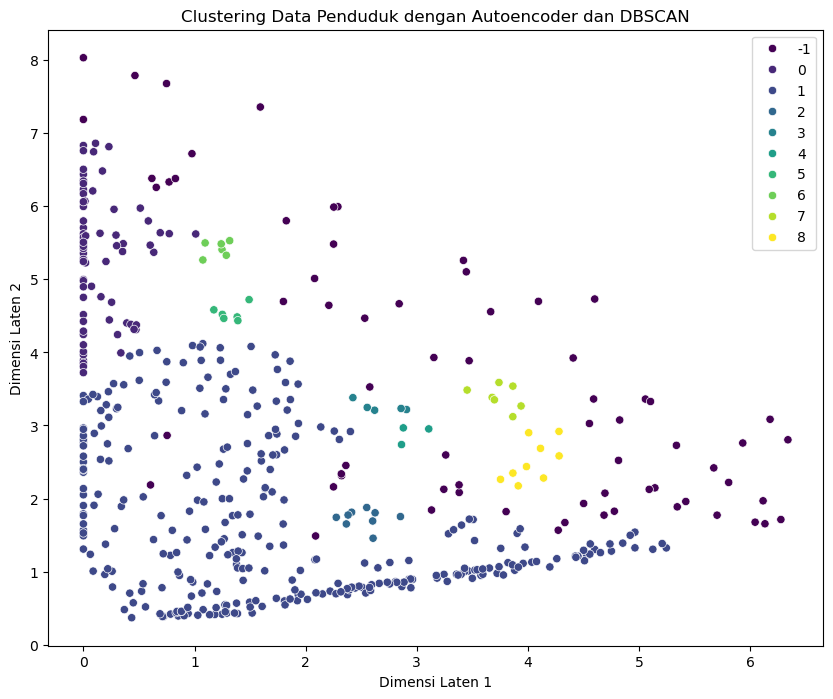

               Age        Income  Education_Level  Family_Size  Spending_Score
Cluster                                                                       
-1       38.426471  47161.838235        11.647059     2.382353       30.264706
 0       54.423077  58819.000000         3.987179     3.435897       40.756410
 1       43.336570  99844.152104        11.288026     3.048544       55.343042
 2       53.333333  66330.000000        15.000000     3.444444       49.666667
 3       43.000000  45809.200000        11.400000     2.600000       45.400000
 4       46.333333  42257.666667        13.666667     3.333333       49.666667
 5       43.833333  54861.333333         6.166667     2.000000       42.000000
 6       32.500000  43188.333333         3.666667     3.000000       36.333333
 7       32.857143  43312.285714        11.714286     1.857143       41.285714
 8       37.666667  46524.333333        14.666667     2.555556       42.222222


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

#simulasi dataset penduduk
np.random.seed(42)
n_samples = 500
data = pd.DataFrame({
    'Age': np.random.randint(18, 70, n_samples),
    'Income': np.random.randint(20000, 150000, n_samples),
    'Education_Level': np.random.randint(1, 21, n_samples),
    'Family_Size': np.random.randint(1, 6, n_samples),
    'Spending_Score': np.random.randint(1, 101, n_samples)
})

#Standarisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

#membangun autoencoder
input_dim = data_scaled.shape[1]
encoding_dim = 2 #dimensi representasi laten (bisa besar bisa kecil)

#encoder
input_layer =Input(shape=(input_dim,))
encoded = Dense(6, activation='relu')(input_layer)
encoded = Dense(4, activation='relu')(input_layer)
encoded = Dense(encoding_dim, activation='relu')(encoded)

#decoder
decoded = Dense(4, activation='relu')(encoded)
decoded = Dense(6, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

#autoencoder model
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

#melatih autoencoder
autoencoder.fit(data_scaled, data_scaled, epochs=50, batch_size=32, shuffle=True, validation_split=0.2, verbose=1)

#encoder model untuk representadi laten
encoder = Model(input_layer, encoded)
data_encoded = encoder.predict(data_scaled)

#clustering dengan DBSCAN pada representasi laten
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(data_encoded)

#Visualisasi hasil clustering
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data_encoded[:, 0], y=data_encoded[:, 1], hue=labels, palette='viridis', legend='full')
plt.title('Clustering Data Penduduk dengan Autoencoder dan DBSCAN')
plt.xlabel('Dimensi Laten 1')
plt.ylabel('Dimensi Laten 2')
plt.show()

#menampilkan hasil cluster
data['Cluster'] = labels
print(data.groupby('Cluster').mean())